### **1. Introduction**

High-dimensional data is fairly common nowadays. It can be defined as a data set where the number of regressors/predictors (P) is greater than the number of observations (N). High-dimensional data could be a result of two phenomena: <br>
1. When the number of characteristics per observation is larger than the sample size. Example: when the medical tests per patient are larger than the chosen sample size <br>  
2. When the researcher includes a large number of variable transformations in the regression. Example: since the true functional form is unknown, the researcher adds interaction terms, variables with functional transformation, etc. such that the number of regressors is greater than the number of observations. <br>
**What if $P>N$?** <br>
When the number of regressors is greater than the number of observations, the regression cannot be identified using OLS <br>
**What if $P=N$?** <br>
When the number of regressors is equal to the number of observations, the OLS fits the data perfectly such that $R^2=1$ <br>
**What if $P<N$?** <br>
When the number of regressors is smaller than the number of observations, we will not only be able to identify the model but also avoid overfitting issues as otherwise. When we have high-dimensional data, we need to reduce the dimensions (regularize) such that $P<N$ to draw meaningful conclusions from it.

### **2. Theoretical Background**

#### **Approximately Sparse Regression Models**

The authors consider the following model to forecast the outcome ($y_i$) and treat $g(w_i)$ as a high-dimensional, linear model such that <br>
<br>
$$y_i=g(w_i)+\zeta_i \hspace{0.1cm}, \hspace{0.25cm} i=1,...n \hspace{0.25cm} \& \hspace{0.25cm} E(\zeta_i|w_i)=0$$ <br>
$$g(w_i) =\sum_{j=1}^{p}{\beta_jx_{i,j}}+r_{p,i} \hspace{0.25cm}$$
<div style="text-align: justify">   
$r_{p,i}$ is an approximation error. To identify the model, avoid overfitting and for better prediction ability, we need to regularize the function $g(\cdot)$. Typically, researchers regularize based on economic theory and intuition. However, the question of the correct variables and the transformations being chosen is left unanswered. Another approach to reduce dimensions is the approximate sparsity of the high-dimensional linear model. <br>
</div>
<blockquote>“Approximate sparsity imposes a restriction that only $s$ variables among all of $x_{i,j}$, where $s$ is much smaller than $n$, have associated coefficients $\beta_j$ that are different from $0$, while permitting a nonzero approximation error $r_{p,i}$.” </blockquote>
This implies only S of the P regressors have coefficients that are not equal to zero and $S<P<N$. One of the methods for estimating the parameter of sparse high-dimensional models is the Least Absolute Shrinkage and Selection Operator (LASSO). In this paper, the authors use a variant of LASSO estimator defined as: <br> 
<br>    
$$\hat{\beta}=\mathop{\rm argmax}\limits_b\sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{i,j}b_j)^2+\lambda\sum_{j=1}^{p}|b_j|\gamma_j \hspace{0.25cm}$$
<br>  
$\lambda>0$ is the penalty and $\gamma_j$ are the penalty loadings. LASSO leads to some of the coefficients being set exactly to zero. Thus, it could be used in variable selection process by simply selecting the variables with nonzero coefficients. This addresses the problem when researcher doesn’t know a priori exactly which variables should in the model. <br> 
<br>      
    
This variant is proposed in [Belloni, Chen, Chernozhukov, and Hansen (2012)](https://www.econometricsociety.org/publications/econometrica/2012/11/01/sparse-models-and-methods-optimal-instruments-application).

#### **Model Selection when the goal is Causal Inference**

The main aim of this paper is to use data mining procedures like LASSO for regularizing high-dimensional data to produce meaningful inferences. Authors stress that when the end goal is causal inference, LASSO should be used only for regularization purposes i.e, to only select variables whose coefficients are nonzero but not to interpret their coefficients directly. This is because: <br> 
1. Such procedures are designed for forecasting purposes and not to inference about model parameters <br> 
2. Model selection mistakes occur which then might lead to the problem of omitted variable bias <br>  

Thus, naively using results obtained from LASSO estimation might lead to inference problems. The authors explain when and how to use LASSO when the end goal of the researcher is causal inference about model parameters.

#### **Inference with Selection among many Instruments (Z)**

The authors consider the following linear instrumental variable model <br>
$$y_i=\alpha d_i+\varepsilon_i \hspace{0.25cm} where \hspace{0.25cm} d_i={z_i}^{'}\Pi+r_i+\nu_i$$ <br>
$$E(\varepsilon_i|z_i)=E(\nu_i|z_i,r_i)=0 \hspace{0.25cm} but \hspace{0.25cm} E(\varepsilon_i|\nu_i)\ne0$$ <br>
$d_i$ is an endogenous variable, $z_i$ is a p-dimensional vector of instruments and $r_i$ is an approximation error. In this scenario, the number of instruments is greater than the number of observations $(Z>N)$ which calls for selection among the instruments to be able to estimate $\alpha$ <br>

**Choosing instruments in case of one endogenous variable:** <br>
Step 1: Use LASSO to regress $d_i$ (endogenous variable) on $z_i$ (instrumental variables) <br>
Step 2: Select the instrument(s) with nonzero coefficients from step 1 <br>
Step 3: Carry out standard 2SLS estimation using the selected instrument(s) from step 2 <br>

**Choosing instruments in case of more than one endogenous variable:** <br>
Step 1: Use LASSO to regress $d_i$ on $z_i$ for each of the endogenous variables <br>
Step 2: Select the instrument(s) with nonzero coefficients from step 1 for each of the endogenous variables <br>
Step 3: Carry out standard 2SLS estimation using the union of the selected instruments from step 2

#### **Inference with Selection among many Controls (C)**

The authors consider the following linear model where a treatment variable, $d_i$, is taken as exogenous after conditioning on control variables <br>


$$\tag{1}\label{eq:1}y_i=\alpha d_i+ x_i^{'}\theta_y+r_{yi}+\zeta_i \hspace{0.1cm} ,\hspace{0.25cm} E(\zeta_i|d_i,x_i,r_{yi})=0$$
<div style="text-align: justify"> $x_i$ is a p-dimensional vector of controls and $r_{yi}$ is an approximation error. In this scenario, the number of controls is greater than the number of observations $(C>N)$ which calls for selection among the controls to be able to estimate $\alpha$ which is the effect of the treatment on the outcome. To ensure $\alpha$ remains in the model as it is the parameter of interest, one should exclude the treatment variable from the model selection process. Thus, regularization will only be carried out on the remaining exogenous variables (controls) which are referred to as ‘nuisance’ by the authors. </div> <br>

**Naïve Approach for Selection among many Controls (C)**  <br>
Step 1: Use LASSO to regress $y_i$ (outcome variable) on $x_i$ (control variables) <br>
Step 2: Select the control(s) with nonzero coefficients from step 1 <br>
Step 3: Carry out standard OLS estimation using the selected control(s) from step 2
<div style="text-align: justify">Running LASSO with $y_i$ on $x_i$ (step 1) only allows us to select those variables with nonzero coefficients associated to $y_i$. However, it ignores the relationship between treatment variable and controls leading to omitted variable bias. This is a major drawback of using the naïve approach. To understand the relationship between treatment variable and controls, the following equations are introduced by the authors </div> <br>

$$\tag{2}\label{eq:2}d_i=x_i^{'}\theta_d+r_{di}+\nu_i \hspace{0.1cm} ,\hspace{0.25cm} E(\nu_i|x_i,r_{di})=0$$ <br>

$$\tag{3}\label{eq:3}y_i=x_i^{'}(\alpha\theta_d+\theta_y)+(\alpha r_{di}+r_{yi})+(\alpha\nu_i+\zeta_i)=x_i^{'}\pi+r_{ci}+\varepsilon_i \hspace{0.1cm} ,\hspace{0.25cm} E(\varepsilon_i|x_i,r_{ci})=0$$ <br>

<div style="text-align: justify">Substituting equation \eqref{eq:2} in \eqref{eq:1} will yield \eqref{eq:3}. $r_{ci}$ is a composite approximation error. Spare high-dimensional methods work best for predictions and not inferences. Equation \eqref{eq:1} represents a structural model where the goal to is to learn the causal inference. Whereas, equations \eqref{eq:2} and \eqref{eq:3} represent predictive relationships, which can be estimated by high-dimensional methods. Thus, to counter against the omitted variable bias, we use both the equations to select the controls. This is called the Post-Double Selection (PDS) LASSO.</div> <br>

**Post-Double-Selection (PDS) for Selection among many Controls (C)** <br>
Step 1: Use LASSO to regress $y_i$ (outcome variable) on $x_i$ (control variables) <br>
Step 2: Select the control(s) with nonzero coefficients from step 1 <br>
Step 3: Use LASSO to regress $d_i$ (treatment variable) on $x_i$ (control variables) <br>
Step 4: Select the control(s) with nonzero coefficients from step 3 <br>
Step 5: Carry out standard OLS estimation using the union of selected controls from step 2 and step 4 <br>

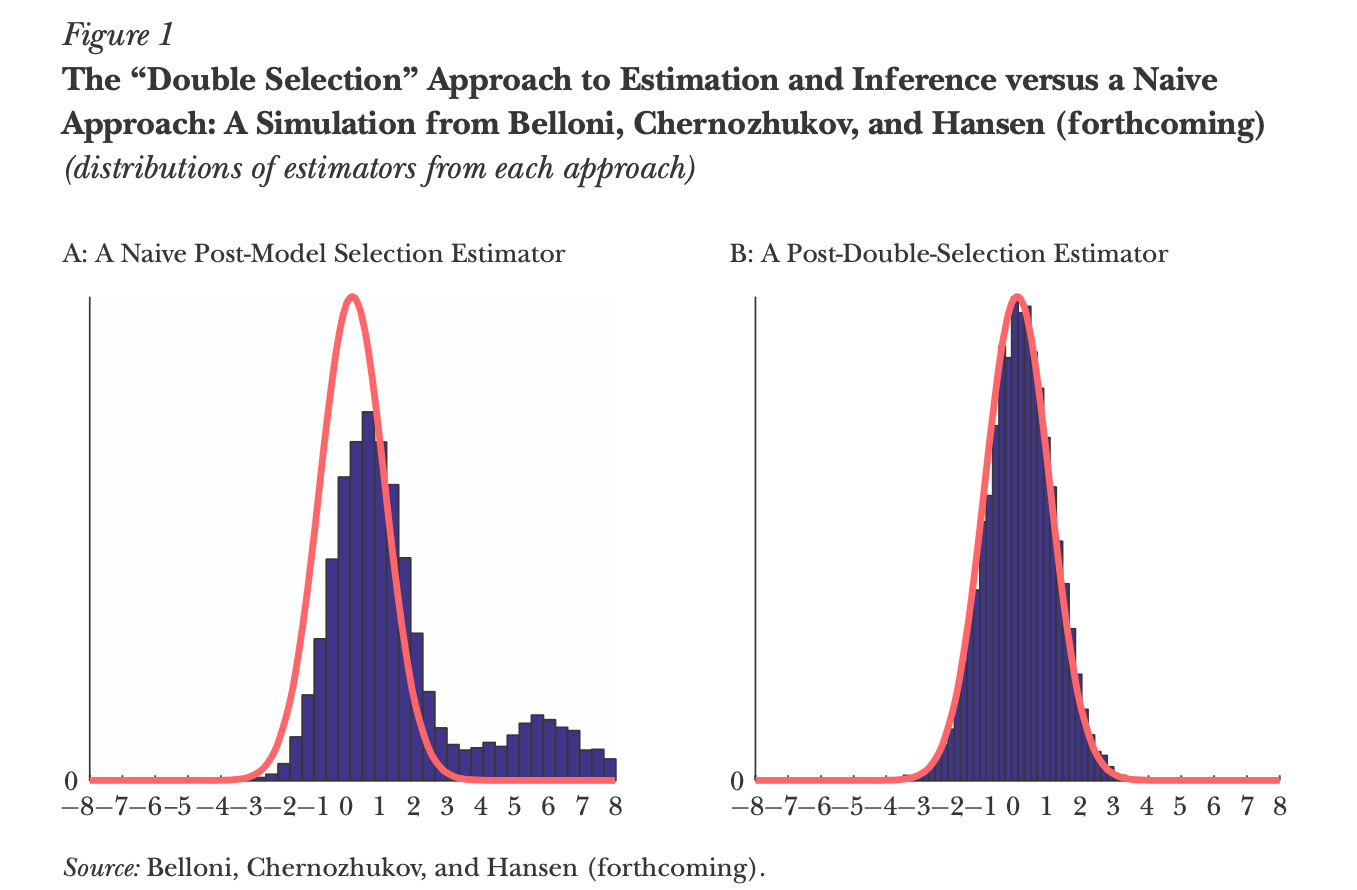

In [1]:
from IPython.display import display, Image
display(Image(filename='simulation.png', width=600))

Figure 1 is a simulation study from [Belloni, Chernozhukov, and Hansen (2014)](https://academic.oup.com/restud/article-abstract/81/2/608/1523757?redirectedFrom=fulltext). It compares the sampling distribution of the estimator of $\alpha$ from naïve approach and PDS approach. The left panel suffers from the omitted variable bias which is absent in the right panel.<br>


The authors use three empirical examples in this paper and implement the LASSO for selecting controls and instruments in high-dimensional data.

### **3. Empirical Example 1: Estimating the Impact of Eminent Domain on House Prices**

*Chen, Daniel L., and Susan Yeh. 2012. [“Growth under the Shadow of Expropriation? The Economic Impacts of Eminent Domain.”](http://www.sole-jole.org/13463.pdf)*

#### **3.1. Introduction**

<div style="text-align: justify">
Eminent Domain also known as land acquisition or expropriation is the power of the government to take away private property, in exchange for some money, for public use. The US constitution gives this right to the government under the Fifth Amendment called the Takings Clause. Pro-plaintiff rulings are federal court rulings that say that the government seizure of a private property was unlawful. In the paper by Chen and Yeh (2012), they try to find the effect of such federal court decisions regarding eminent domain on housing prices. <br>
<br>
$$log(Case–Shiller_{ct})=\alpha\cdot TakingsLaw_{ct}+\beta_c+\beta_t+\gamma_{c}t+W_{ct}^{'}\delta+\varepsilon_{ct}$$
<br>
$Case–Shiller_{ct}$ is the average of the Case–Shiller home price index within circuit court $c$ at time $t$. $TakingsLaw_{ct}$ represents the number of pro-plaintiff appellate takings decisions in federal circuit court $c$ and year $t$. $W_{ct}$ are exogenous variables and $\beta_c$, $\beta_t$ and $\gamma_{c}t$ are respectively circuit-specific effects, time-specific effects, and circuit-specific time trends. The parameter of interest, $\alpha$, thus represents the effect of an additional pro-plaintiff decision on property prices.<br>
</div>

#### **3.2. Identification**

<div style="text-align: justify">
The model presented above suffers from endogeneity issue. In their paper, Chen and Yeh (2012), state that court decisions are endogenous. For instance, the pro-plaintiff ruling may be more likely if housing prices in an area are expected to increase. To counter this problem, they employ an instrumental variable approach and consider the characteristics of judges to be the instruments for judicial decisions. Judges are randomly assigned to three-judge panels. Since the characteristics of judges are unrelated to any other factors except for their judicial decisions that may affect the housing prices, the instruments are argued to be valid. <br>
</div>    
<img src= "CG1.png" width ="300" height=300>
<div style="text-align: justify">
The above causal graph illustrates the relationship between pro-plaintiff decisions (D) and housing prices (Y). Since judicial decisions (D) are endogenous, the estimates of regressing Y on D will be biased. ?????Explain the backdoor path???? To resolve this, the authors use the characteristics of judges (Z) as an instrument and argue it to be valid. Thus Z satisfies the exclusion restriction and effects Y only through D. <br>
The characteristics of judges include their preferences over governments and individual property rights, gender, race, religion, political party affiliation, source of academic degrees, and if the judges had been promoted from a district court. The list of potential instruments not only included these characteristics for each judge but also interaction terms with various combinations. The data set consists of 183 observations, 72 control variables, and 147 instrumental variables. The model cannot be identified as $N(183)<P(219)$. To estimate this model for causal inference, there is a need to regularize. <br>
In this paper, Belloni et al. (2014), authors use a LASSO variant for reducing the dimensions by selecting among many instruments. They wrote a program for the same due to which, using LassoCV will not give the same results as theirs. <br>
</div>

#### **3.3. Replication**

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from linearmodels import IV2SLS
from sklearn.linear_model import LassoCV

In [3]:
#loading the data
df1=pd.read_csv("Data/ED.csv")
df=df1.drop(['Unnamed: 0','nControl'],axis=1)
df.shape 

(183, 149)

The data set consists of 183 observations, 147 instrumental variables, 1 endogenous variable and 1 outcome variable. The authors didn't provide any data on control varibles. However, they mention that the original dataset used by Chen & Yeh (2012) consists of 72 control varibles.

In [4]:
df.head(5)

,CSIndex,NumProCase,Z1xNR,Z1xJDP,Z1xD,Z2xD,Z3xD,Z1xDSq,Z1xDCu,Z1xF,...,Z1xPROC1xM,Z1xPROC1xEV,Z1xPROC1xPRO,Z1xPROC1xNW,Z1xMC1xJ,Z1xMC1xCAT,Z1xMC1xNR,Z1xMC1xEV,Z1xMC1xM,Z1xMC1xNW
0,0.071146,0.119098,-0.067744,0.102502,-0.024818,0.247578,0.085026,-0.375188,-1.487713,0.091808,...,-0.480826,0.096378,0.210369,-0.267153,-0.127030,-0.055966,-0.341225,-0.139522,-0.460450,-0.658211
1,0.024656,-0.082198,0.102703,0.198287,0.010865,0.179050,-0.021043,0.510609,3.374342,0.076370,...,0.129356,-0.044288,0.593042,0.887688,0.306955,-0.069646,0.282035,-0.092997,-0.004318,0.536386
2,0.051935,-0.001592,-0.126258,-0.000265,-0.540937,-0.282949,0.102560,-0.123052,2.311071,0.005722,...,1.352279,0.231767,0.699562,-0.208514,0.808672,0.291625,-0.050386,0.585404,1.199408,0.485358
3,-0.017423,-0.037161,-0.052893,-0.214215,0.164018,-0.413705,-0.100744,-0.272045,-3.395065,0.073229,...,-0.496520,0.083141,-1.442539,-0.490165,-0.981868,0.242997,0.054547,-0.006271,-0.141818,0.078161
4,-0.057601,0.096159,0.144511,0.150797,0.495104,0.244553,-0.020875,0.619919,-0.361951,0.123615,...,0.481784,-0.712932,-0.682744,-1.148617,0.231269,-0.062621,0.361904,0.094149,0.447288,-0.603682


Authors use their own program on STATA to select instruments using LASSO. For this, they regress the endogenous variable (NumProCase) on all the instrumental variables. I use LassoCV to do this.

In [7]:
y = df.iloc[:,1] #Endogenous variable
#y
X = df.iloc[:,2:] #Instruments
X.shape

(183, 147)

In [8]:
clf = LassoCV(max_iter = 100000).fit(X,y)
coeff_nonzero = np.sum(clf.coef_!=0)
print(coeff_nonzero)

75


Using LassoCV gives 75 nonzero coefficients. However, the authors find only one nonzero coefficient using their program. They find Z1xJDPSq as the LASSO selected instrument and use it to carry out the 2SLS estimation. So, I use the same variable to carry out further replications.

In [7]:
IV_1= IV2SLS(df.CSIndex,None,df.NumProCase,df.Z1xJDPSq).fit()
print(IV_1.first_stage)

    First Stage Estimation Results    
                            NumProCase
--------------------------------------
R-squared                       0.1826
Partial R-squared               0.1826
Shea's R-squared                0.1826
Partial F-statistic             47.101
P-value (Partial F-stat)     6.742e-12
Partial F-stat Distn           chi2(1)
========================== ===========
Z1xJDPSq                        0.4495
                              (6.8630)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [8]:
print(IV_1)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                CSIndex   R-squared:                     -0.0704
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0763
No. Observations:                 183   F-statistic:                    7.7963
Date:                Wed, Jun 17 2020   P-value (F-stat)                0.0052
Time:                        01:59:35   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
NumProCase     0.0668     0.0239     2.7922     0.0052      0.0199      0.1137

Endogenous: NumProCase
Instruments: Z1xJDPSq
Robust

In [9]:
IV_2= IV2SLS(df.CSIndex,None,df.NumProCase,df.Z1xD).fit()
print(IV_2.first_stage)

    First Stage Estimation Results   
                           NumProCase
-------------------------------------
R-squared                      0.0047
Partial R-squared              0.0047
Shea's R-squared               0.0047
Partial F-statistic            0.5283
P-value (Partial F-stat)       0.4673
Partial F-stat Distn          chi2(1)
========================== ==========
Z1xD                           0.0664
                             (0.7269)
-------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [10]:
print(IV_2)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                CSIndex   R-squared:                     -1.8818
Estimator:                    IV-2SLS   Adj. R-squared:                -1.8976
No. Observations:                 183   F-statistic:                    0.3907
Date:                Wed, Jun 17 2020   P-value (F-stat)                0.5319
Time:                        01:59:41   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
NumProCase    -0.2368     0.3788    -0.6251     0.5319     -0.9792      0.5056

Endogenous: NumProCase
Instruments: Z1xD
Robust Cov

#### **3.4. Additional Contribution**

In [9]:
lasso_selected=df[(X.columns)[clf.coef_!=0]]
lasso_selected.shape
lasso_selected.head()

,Z1xD,Z2xD,Z3xD,Z1xDCu,Z1xF,Z1xNW,Z2xJ,Z1xCAT,Z2xCAT,Z1xIBA,...,Z1xIBAC1xE,Z1xIBAC1xNW,Z1xEC1xJ,Z1xEC1xEV,Z1xPROC1xCAT,Z1xPROC1xPRO,Z1xPROC1xNW,Z1xMC1xJ,Z1xMC1xM,Z1xMC1xNW
0,-0.024818,0.247578,0.085026,-1.487713,0.091808,-0.063642,0.038257,0.011376,0.029915,-0.135196,...,-1.145551,-0.504142,-0.035835,-0.349739,0.435839,0.210369,-0.267153,-0.127030,-0.460450,-0.658211
1,0.010865,0.179050,-0.021043,3.374342,0.076370,0.149682,-0.087899,-0.011519,0.118968,-0.117562,...,-0.061210,0.810152,0.270317,-0.365366,0.362987,0.593042,0.887688,0.306955,-0.004318,0.536386
2,-0.540937,-0.282949,0.102560,2.311071,0.005722,-0.466594,-0.099226,-0.095628,-0.229022,0.538459,...,0.985012,0.275111,0.120697,0.029200,-0.216945,0.699562,-0.208514,0.808672,1.199408,0.485358
3,0.164018,-0.413705,-0.100744,-3.395065,0.073229,0.038919,-0.061844,0.323676,-0.022779,0.140907,...,1.744673,-0.331501,-0.496418,1.358921,-0.359081,-1.442539,-0.490165,-0.981868,-0.141818,0.078161
4,0.495104,0.244553,-0.020875,-0.361951,0.123615,-0.108410,0.014020,-0.273741,-0.275155,0.051300,...,0.067476,-0.594279,-0.617119,-0.544650,-1.126864,-0.682744,-1.148617,0.231269,0.447288,-0.603682


In [11]:
IV_3= IV2SLS(df.CSIndex,None,df.NumProCase,lasso_selected).fit()
print(IV_3)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                CSIndex   R-squared:                      0.0072
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0017
No. Observations:                 183   F-statistic:                    1.2931
Date:                Wed, Jun 17 2020   P-value (F-stat)                0.2555
Time:                        22:06:50   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
NumProCase     0.0140     0.0124     1.1371     0.2555     -0.0102      0.0383

Endogenous: NumProCase
Instruments: Z1xD, Z2xD, Z3x

In [ ]:
#Table comparing all the results:
#1. All instruments 
#2. Instruments which authors chose
#3. Iinstruments from LassoCV 
#4. Instrument based on intruition 
#Robustness checks
#Plots

### **4. Empirical Example 2**

#### **4.3. Replication**

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from linearmodels import FirstDifferenceOLS

In [3]:
#loading the data
df2=pd.read_csv("Data/abortion.csv")
year = pd.Categorical(df2.year)
df2 = df2.set_index(['statenum','year'])
df2['year'] = year
df2.head(20)

popul  lpc_viol  lpc_prop  lpc_murd   efamurd   efaviol  \
statenum year                                                                
1        85    3973.0000  1.532720  3.562942 -2.305862  0.000860  0.009147   
         86    3992.0000  1.734365  3.634252 -2.278332  0.001346  0.014100   
         87    4015.0000  1.738170  3.678351 -2.357621  0.005252  0.031547   
         88    4024.0000  1.745476  3.714935 -2.288764  0.009683  0.051825   
         89    4030.0000  1.797903  3.719690 -2.258889  0.022214  0.088065   
         90    4050.0000  1.955738  3.736929 -2.160143  0.045824  0.137850   
         91    4090.0000  2.132936  3.811173 -2.165698  0.081772  0.204788   
         92    4138.0000  2.164750  3.782898 -2.207670  0.132795  0.286392   
         93    4187.0000  2.054656  3.713170 -2.157655  0.201094  0.387293   
         94    4219.0000  1.922304  3.742270 -2.130747  0.285934  0.508474   
         95    4262.7300  1.841993  3.739117 -2.194350  0.394172  0.643107   
         96    4290.3999  1.728276  3.746543 -2.268311  0.518011  0.792103   
         97    4319.0000  1.730698  3.767063 -2.316340  0.657863  0.945164   
2        85     532.0000  1.740004  3.948493 -2.344818  0.008104  0.044876   
         86     544.0000  1.722635  4.020185 -2.470308  0.018418  0.078509   
         87     539.0000  1.489751  3.870002 -2.319424  0.039326  0.127784   
         88     542.0000  1.599052  3.728934 -2.927970  0.072702  0.189016   
         89     547.0000  1.567625  3.719795 -2.566779  0.124389  0.268125   
         90     554.0000  1.650115  3.827581 -2.603593  0.189508  0.351006   
         91     569.0000  1.816352  3.931171 -2.606211  0.270876  0.458405   

                efaprop  xxprison  xxpolice  xxunemp   xxincome    xxpover  \
statenum year                                                                
1        85    0.036162  0.952666  0.762663  0.08908   9.703193  20.600000   
         86    0.055097  0.995291  0.790903  0.09833   9.745950  23.799999   
         87    0.104993  1.058402  0.818914  0.07775   9.762092  21.299999   
         88    0.163302  1.143818  0.880334  0.07208   9.781770  19.299999   
         89    0.250177  1.121946  0.941032  0.07025   9.802527  18.900000   
         90    0.355552  1.214463  0.989107  0.06775   9.814290  19.200001   
         91    0.485697  1.333375  1.031381  0.07200   9.819260  18.799999   
         92    0.634912  1.388736  1.061163  0.07300   9.845286  17.100000   
         93    0.802412  1.409347  1.064861  0.07500   9.852161  17.400000   
         94    0.988347  1.467732  1.088048  0.06000   9.879334  16.400000   
         95    1.173354  1.534553  1.100586  0.06300   9.924404  20.100000   
         96    1.361476  1.581093  1.146687  0.05100   9.940027  14.000000   
         97    1.533093  1.623693  1.179529  0.05100   9.937270  15.700000   
2        85    0.142601  0.922497  1.051474  0.09608  10.221640   8.700000   
         86    0.227305  1.056380  1.080275  0.10908  10.169600  11.400000   
         87    0.334470  1.119232  1.019590  0.10800  10.101300  12.000000   
         88    0.449014  1.187323  1.159201  0.09225  10.099450  11.000000   
         89    0.581722  1.234141  1.268973  0.06742  10.143160  10.500000   
         90    0.702194  1.249362  1.262897  0.07025  10.150400  11.400000   
         91    0.857295  1.206317  1.253279  0.08500  10.143760  11.800000   

                 xxafdc15  xxgunlaw     xxbeer year  
statenum year                                        
1        85     3077.6289         1  18.700001   85  
         86     2805.7781         1  19.299999   86  
         87     3455.7419         1  19.400000   87  
         88     3210.0000         1  19.400000   88  
         89     3789.4929         1  19.400000   89  
         90     3436.7290         1  20.100000   90  
         91     3486.4319         1  20.100000   91  
         92     3591.3860         1  20.400000   92  
         93     3308.4661         1  20.29999

In [6]:
exog_var_viol = ['efaviol','xxprison', 'xxpolice', 'xxunemp','xxincome', 'xxpover', 'xxafdc15', 'xxgunlaw', 'xxbeer','year']
exog1 = df2[exog_var_viol]
FD1 = FirstDifferenceOLS(df2.lpc_viol,exog1).fit(cov_type='clustered', cluster_entity=True)
print(FD1)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:               lpc_viol   R-squared:                        0.2797
Estimator:         FirstDifferenceOLS   R-squared (Between):              0.2386
No. Observations:                 600   R-squared (Within):               0.4848
Date:                Thu, Jun 18 2020   R-squared (Overall):              0.2405
Time:                        22:39:33   Log-likelihood                    741.96
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      10.708
Entities:                          50   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                  F(21,579)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             28.383
                            

In [7]:
exog_var_prop = ['efaprop','xxprison', 'xxpolice', 'xxunemp','xxincome', 'xxpover', 'xxafdc15', 'xxgunlaw', 'xxbeer','year']
exog2 = df2[exog_var_prop]
FD2 = FirstDifferenceOLS(df2.lpc_prop,exog2).fit(cov_type='clustered', cluster_entity=True)
print(FD2)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:               lpc_prop   R-squared:                        0.2281
Estimator:         FirstDifferenceOLS   R-squared (Between):             -0.1329
No. Observations:                 600   R-squared (Within):               0.3641
Date:                Thu, Jun 18 2020   R-squared (Overall):             -0.1327
Time:                        22:39:39   Log-likelihood                    990.99
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      8.1471
Entities:                          50   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                  F(21,579)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             40.238
                            

In [8]:
exog_var_murd = ['efamurd','xxprison', 'xxpolice', 'xxunemp','xxincome', 'xxpover', 'xxafdc15', 'xxgunlaw', 'xxbeer','year']
exog3 = df2[exog_var_murd]
FD3 = FirstDifferenceOLS(df2.lpc_murd,exog3).fit(cov_type='clustered', cluster_entity=True)
print(FD3)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:               lpc_murd   R-squared:                        0.0741
Estimator:         FirstDifferenceOLS   R-squared (Between):             -29.426
No. Observations:                 600   R-squared (Within):               0.0909
Date:                Thu, Jun 18 2020   R-squared (Overall):             -29.286
Time:                        22:40:37   Log-likelihood                   -26.085
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2.2076
Entities:                          50   P-value                           0.0016
Avg Obs:                       13.000   Distribution:                  F(21,579)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             13.818
                            